# Loan Prediction Project

The goal of this project is predict the eligibility of a customer to recive a loan.

In [83]:
# lbis to be used

import pandas as pd
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix
import itertools

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
file_path = "C:\\Users\\ajoor\\Desktop\\Projects\LoanPrediction\\Data\\"


file_name1 = "loan_train.csv"
file_name2 = "loan_test.csv"

In [3]:
df1 = pd.read_csv(file_path+file_name1)
df2 = pd.read_csv(file_path+file_name2)

In [4]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Inspecting the first dataframe
print('Shape:', df1.shape)
print ("----------------------------------")
print('Columns:', df1.columns)
print ("----------------------------------")
print ("Gender: ",df1['Gender'].unique())
print ("----------------------------------")
print ("Married: ",df1['Married'].unique())
print ("----------------------------------")
print ("Dependents: ",df1['Dependents'].unique())
print ("----------------------------------")
print ("Education: ",df1['Education'].unique())
print ("----------------------------------")
print ("Self_Employed: ",df1['Self_Employed'].unique())
print ("----------------------------------")
print ("Credit_History: ",df1['Credit_History'].unique())
print ("----------------------------------")
print ("Property_Area: ",df1['Property_Area'].unique())
print ("----------------------------------")
print ("Loan_Status: ",df1['Loan_Status'].unique())
print ("----------------------------------")
print ('     ','n')
print (df1['Loan_Status'].value_counts())
print ("----------------------------------")
print (df1.dtypes)

Shape: (614, 13)
----------------------------------
Columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
----------------------------------
Gender:  ['Male' 'Female' nan]
----------------------------------
Married:  ['No' 'Yes' nan]
----------------------------------
Dependents:  ['0' '1' '2' '3+' nan]
----------------------------------
Education:  ['Graduate' 'Not Graduate']
----------------------------------
Self_Employed:  ['No' 'Yes' nan]
----------------------------------
Credit_History:  [ 1.  0. nan]
----------------------------------
Property_Area:  ['Urban' 'Rural' 'Semiurban']
----------------------------------
Loan_Status:  ['Y' 'N']
----------------------------------
      n
Y    422
N    192
Name: Loan_Status, dtype: int64
----------------------------------
Loan_ID            

 - Gender, Married, Education, Property_Area, Self_Employed, & Loan_Status should be converted to categorical values.
 - Credit_History, & Dependents categorical ?

In [6]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


- The column loan status does **NOT** exist in df2, and therefore, it will be predicited
- We can combine both dataframes to prepare the data

In [7]:
df1_copy = df1.copy()

In [8]:
df1_copy.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [9]:
y=df1_copy[["Loan_ID","Loan_Status"]]
df1_copy.drop("Loan_Status", axis=1, inplace= True)

In [10]:
df = pd.concat([df1_copy,df2])   # It is important that the order stays the same

In [11]:
df.shape 

(981, 12)

## Dealing with catgorical NaN values

In [12]:
def NanReplacer(column,value):
    df[[column]] = df[[column]].fillna(value=value)
    print(df[column].value_counts())
    

In [13]:
NanReplacer(column='Gender',value= "Un-specified")

Male            775
Female          182
Un-specified     24
Name: Gender, dtype: int64


In [14]:
NanReplacer(column='Married',value= "UnKnown")

Yes        631
No         347
UnKnown      3
Name: Married, dtype: int64


In [15]:
NanReplacer(column='Dependents',value= "UnKnown")

0          545
2          160
1          160
3+          91
UnKnown     25
Name: Dependents, dtype: int64


In [16]:
NanReplacer(column='Self_Employed',value= "UnKnown")

No         807
Yes        119
UnKnown     55
Name: Self_Employed, dtype: int64


In [17]:
NanReplacer(column='Credit_History',value= "UnKnown")

1.0        754
0.0        148
UnKnown     79
Name: Credit_History, dtype: int64


In [18]:
df[["Gender"]] = df[["Gender"]].astype('category')
df[["Married"]] = df[["Married"]].astype('category')
df[["Dependents"]] = df[["Dependents"]].astype('category')
df[["Education"]] = df[["Education"]].astype('category')
df[["Self_Employed"]] = df[["Self_Employed"]].astype('category')
df[["Credit_History"]] = df[["Credit_History"]].astype('category')
df[["Property_Area"]] = df[["Property_Area"]].astype('category')

In [19]:
df.dtypes

Loan_ID                object
Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History       category
Property_Area        category
dtype: object

## Dealing with Numeric NaN values

In [20]:
print ('                       ','n')
print("ApplicantIncome:       ",df["ApplicantIncome"].isna().sum())
print("CoapplicantIncome:     ",df["CoapplicantIncome"].isna().sum())
print("LoanAmount:            ",df["LoanAmount"].isna().sum())
print("Loan_Amount_Term:      ",df["Loan_Amount_Term"].isna().sum())


                        n
ApplicantIncome:        0
CoapplicantIncome:      0
LoanAmount:             27
Loan_Amount_Term:       20


In [21]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,954.000000,961.000000
mean,5179.795107,1601.916330,142.511530,342.201873
std,5695.104533,2718.772806,77.421743,65.100602
min,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,100.000000,360.000000
50%,3800.000000,1110.000000,126.000000,360.000000
75%,5516.000000,2365.000000,162.000000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


In [22]:
df[["LoanAmount"]] = df[["LoanAmount"]].fillna(value=df.LoanAmount.median()) # replace NaNs with median value
df[["Loan_Amount_Term"]] = df[["Loan_Amount_Term"]].fillna(value=df.Loan_Amount_Term.median()) # replace with mode value

In [23]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,981.000000,981.000000
mean,5179.795107,1601.916330,142.057085,342.564730
std,5695.104533,2718.772806,76.395592,64.482011
min,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,101.000000,360.000000
50%,3800.000000,1110.000000,126.000000,360.000000
75%,5516.000000,2365.000000,160.000000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


In [24]:
# Inspecting the first dataframe
print('Shape:', df.shape)
print ("----------------------------------")
print('Columns:', df.columns)
print ("----------------------------------")
print ("Gender: ",df['Gender'].unique())
print ("----------------------------------")
print ("Married: ",df['Married'].unique())
print ("----------------------------------")
print ("Dependents: ",df['Dependents'].unique())
print ("----------------------------------")
print ("Education: ",df['Education'].unique())
print ("----------------------------------")
print ("Self_Employed: ",df['Self_Employed'].unique())
print ("----------------------------------")
print ("Credit_History: ",df['Credit_History'].unique())
print ("----------------------------------")
print ("Property_Area: ",df['Property_Area'].unique())
print ("----------------------------------")
print (df.dtypes)

Shape: (981, 12)
----------------------------------
Columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
----------------------------------
Gender:  [Male, Female, Un-specified]
Categories (3, object): [Male, Female, Un-specified]
----------------------------------
Married:  [No, Yes, UnKnown]
Categories (3, object): [No, Yes, UnKnown]
----------------------------------
Dependents:  [0, 1, 2, 3+, UnKnown]
Categories (5, object): [0, 1, 2, 3+, UnKnown]
----------------------------------
Education:  [Graduate, Not Graduate]
Categories (2, object): [Graduate, Not Graduate]
----------------------------------
Self_Employed:  [No, Yes, UnKnown]
Categories (3, object): [No, Yes, UnKnown]
----------------------------------
Credit_History:  [1, 0, UnKnown]
Categories (3, object): [1, 0, UnKnown]
-----------------

In [25]:
Dependents = []
for index,row in df.iterrows():
    
    if (row["Dependents"]=="0"):
        Dependents.append("None")
    elif (row["Dependents"]=="1"):
        Dependents.append("One")
    elif (row["Dependents"]=="2"):
        Dependents.append("two")
    elif (row["Dependents"]=="3+"):
        Dependents.append("More than three")
    else:
        Dependents.append("Unkown")


In [26]:
CreditHist = []

for index,row in df.iterrows():
    
    if (row["Credit_History"]==0):
        CreditHist.append("Bad")
    elif (row["Credit_History"]==1):
        CreditHist.append("Good")
    else:
        CreditHist.append("Unkown")

In [27]:
df['Dependents'] = Dependents

In [28]:
df['Credit_History'] = CreditHist

In [29]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,None,Graduate,No,5849,0.0,126.0,360.0,Good,Urban
1,LP001003,Male,Yes,One,Graduate,No,4583,1508.0,128.0,360.0,Good,Rural


## Spliting Back data:

In [30]:
train = pd.merge(df,y, how='inner')
test = df[len(y):len(df)]

In [32]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,None,Graduate,No,5849,0.0,126.0,360.0,Good,Urban,Y
1,LP001003,Male,Yes,One,Graduate,No,4583,1508.0,128.0,360.0,Good,Rural,N
2,LP001005,Male,Yes,None,Graduate,Yes,3000,0.0,66.0,360.0,Good,Urban,Y
3,LP001006,Male,Yes,None,Not Graduate,No,2583,2358.0,120.0,360.0,Good,Urban,Y
4,LP001008,Male,No,None,Graduate,No,6000,0.0,141.0,360.0,Good,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,None,Graduate,No,2900,0.0,71.0,360.0,Good,Rural,Y
610,LP002979,Male,Yes,More than three,Graduate,No,4106,0.0,40.0,180.0,Good,Rural,Y
611,LP002983,Male,Yes,One,Graduate,No,8072,240.0,253.0,360.0,Good,Urban,Y
612,LP002984,Male,Yes,two,Graduate,No,7583,0.0,187.0,360.0,Good,Urban,Y


In [143]:
train.to_csv(file_path+"df.csv") # Exported to be analyzed with R

## R Summary:

**See the Visualiztion notbook**

According to Graphs: **Educated married males** who are **not self employed** and with **zero dependents** are prefered the most.

## Machine Learning:

In [36]:
encode = LabelEncoder()         # encoding categorical variables
train["Loan_Status"] = encode.fit_transform(train["Loan_Status"])


In [54]:
GenderE = LabelEncoder() 
train["Gender"] = encode.fit_transform(train["Gender"])

In [56]:
MarriedE = LabelEncoder() 
train["Married"] = encode.fit_transform(train["Married"])

DependentsE = LabelEncoder() 
train["Dependents"] = encode.fit_transform(train["Dependents"])

EducationE = LabelEncoder() 
train["Education"] = encode.fit_transform(train["Education"])

Self_EmployedE = LabelEncoder() 
train["Self_Employed"] = encode.fit_transform(train["Self_Employed"])

Credit_HistoryE = LabelEncoder() 
train["Credit_History"] = encode.fit_transform(train["Credit_History"])

Property_AreaE = LabelEncoder() 
train["Property_Area"] = encode.fit_transform(train["Property_Area"])


In [57]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,1,0,0,5849,0.0,126.0,360.0,1,2,1
1,LP001003,1,2,2,0,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,1,2,1,0,2,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,2,1,1,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,1,0,0,6000,0.0,141.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,1,0,0,2900,0.0,71.0,360.0,1,0,1
610,LP002979,1,2,0,0,0,4106,0.0,40.0,180.0,1,0,1
611,LP002983,1,2,2,0,0,8072,240.0,253.0,360.0,1,2,1
612,LP002984,1,2,4,0,0,7583,0.0,187.0,360.0,1,2,1


In [58]:
S_train , S_test = train_test_split(train,test_size=0.25,random_state=2020)

In [59]:
train_x = S_train.drop(columns=['Loan_Status','Loan_ID'],axis=1)
train_y = S_train['Loan_Status']

test_x = S_test.drop(columns=['Loan_Status','Loan_ID'],axis=1)
test_y = S_test['Loan_Status']

In [63]:
model = LogisticRegression(solver="liblinear")

In [64]:
Lr = model.fit(train_x,train_y)

In [65]:
yhat = Lr.predict(test_x)

In [70]:
print('\nAccuracy Score:', accuracy_score(test_y,yhat))
print('f1 Score:', f1_score(test_y, yhat, average='weighted'))
print('jaccard Score:', jaccard_score(test_y, yhat, average='weighted'))


Accuracy Score: 0.7792207792207793
f1 Score: 0.750278293135436
jaccard Score: 0.6241258741258741


In [75]:
def plot_confusion_matrix(cm, cat, cmap=plt.cm.Reds):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(cat))
    plt.xticks(tick_marks, cat, rotation=90)
    plt.yticks(tick_marks, cat)
    plt.axis('scaled')
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.82      0.38      0.51        48
           1       0.77      0.96      0.86       106

    accuracy                           0.78       154
   macro avg       0.80      0.67      0.69       154
weighted avg       0.79      0.78      0.75       154



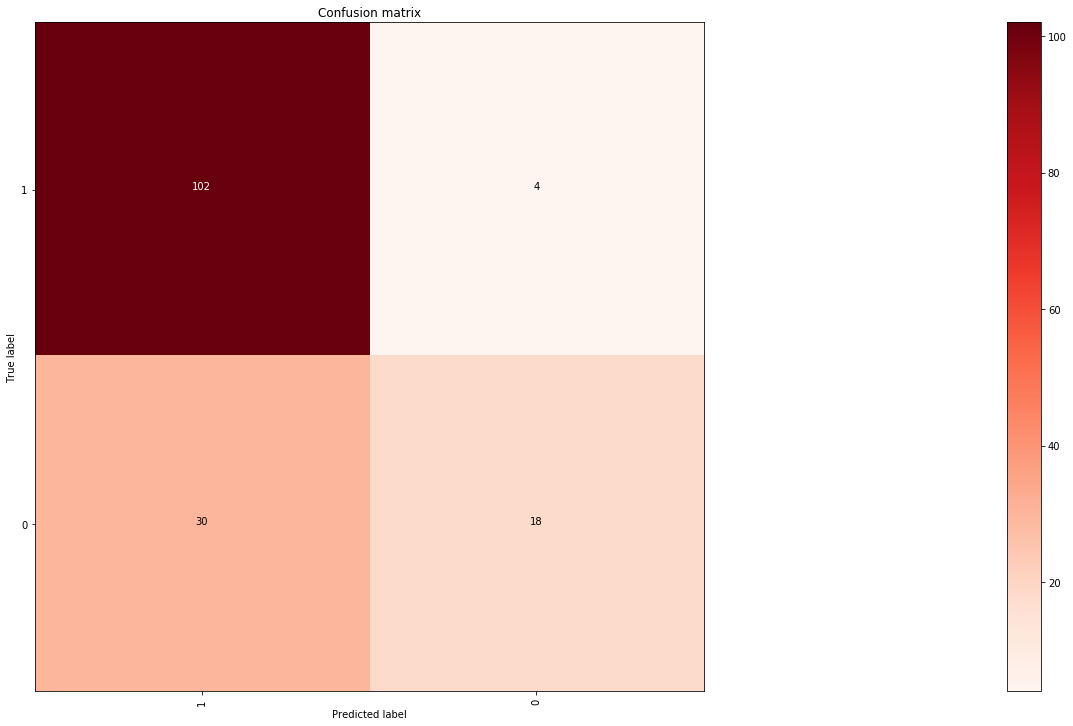

In [86]:
#Compute confusion matrix
test_y2 = encode.inverse_transform(test_y)

cnf_matrix = confusion_matrix(test_y, yhat, labels=[1,0])
np.set_printoptions(precision=2)
print (classification_report(test_y, yhat))

# Plot non-normalized confusion matrix
plt.figure(figsize=(20,10))
plot_confusion_matrix(cnf_matrix,cat=[1,0])